<a href="https://colab.research.google.com/github/jcdevine-web/CMSC320_HW1_sec0201_Git/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [ ]:
df = pd.read_csv('Popular_Spotify_Songs.csv', encoding='latin1')
display(df)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [ ]:
df.nunique()

,0
track_name,943
artist(s)_name,645
artist_count,8
released_year,50
released_month,12
released_day,31
in_spotify_playlists,879
in_spotify_charts,82
streams,949
in_apple_playlists,234


# What is the distribution of Spotify, Apple, Shazam, and Deezer charts and How do These Variables Correlate?

In [ ]:
charts_df = df
charts_df['in_shazam_charts'] = charts_df['in_shazam_charts'].astype(str)
charts_df['in_shazam_charts'] = charts_df['in_shazam_charts'].str.replace(',','',regex = False)
charts_df['in_shazam_charts'] = charts_df['in_shazam_charts'].astype(int)

charts_df = charts_df[['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts']]

charts_df.corr().style.background_gradient(cmap='RdBu_r', vmin = -1, vmax = 1)



,in_spotify_charts,in_apple_charts,in_deezer_charts,in_shazam_charts
in_spotify_charts,1.000000,0.552232,0.600205,0.569568
in_apple_charts,0.552232,1.000000,0.383668,0.401411
in_deezer_charts,0.600205,0.383668,1.000000,0.395786
in_shazam_charts,0.569568,0.401411,0.395786,1.000000


<Axes: >

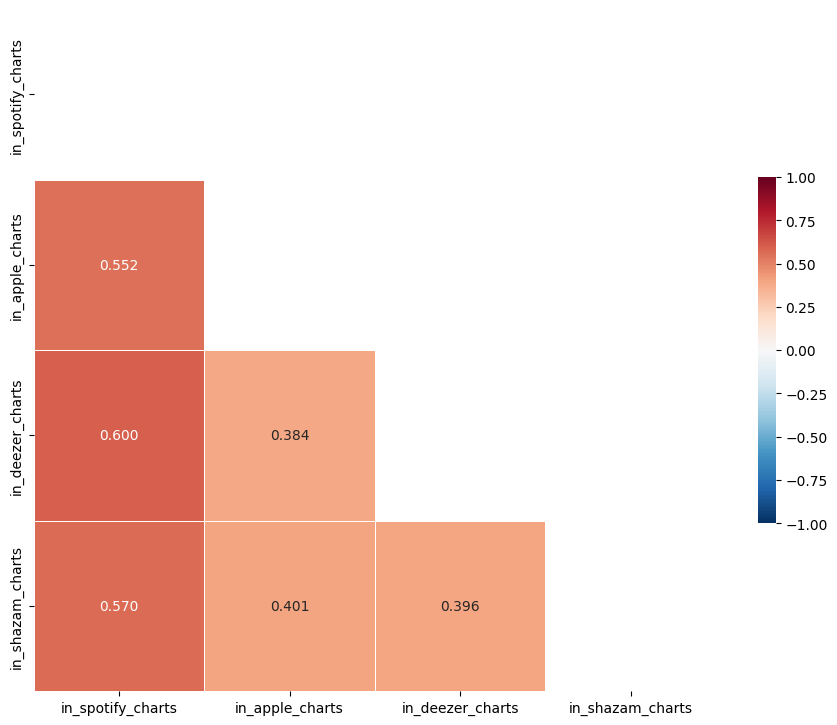

In [ ]:
mask = np.triu(np.ones_like(df_corr.data, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(df_corr.data, mask=mask, cmap='RdBu_r', vmax=1, vmin = -1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, fmt = '.3f', annot = True)

In [ ]:
df.dtypes
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df.isnull().sum()
# only 1 na value out of 953 for streams, so less than 5% so we should drop it
df = df.dropna(subset = ['streams'])
df['streams'] = df['streams'].astype(int)

# Conclusion 2: Does a certain release month lead to more streams?
# Plot release month and streams
df.boxplot(column='streams', by='released_month', figsize=(8,5))
plt.title("Release Month vs Streams")
plt.suptitle("")  # removes the automatic pandas subtitle
plt.xlabel("Release Month")
plt.ylabel("Streams")
plt.grid(False)
plt.show()

# Hypothesis Testing - using Anova
groups = [group['streams'].values for name, group in df.groupby('released_month')]

f_statistic, p_value = stats.f_oneway(*groups)
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Post-Hoc test for Anova
tukey_results = pairwise_tukeyhsd(
    endog=df['streams'],
    groups=df['released_month'],
    alpha=0.05
)
tukey_df = pd.DataFrame(
    data=tukey_results.summary().data[1:],
    columns=tukey_results.summary().data[0]
)
significant_results = tukey_df[tukey_df['reject'] == True]
print(significant_results)


Second Conclusion: The second conclusion is looking at whether a songs release month affected the number of streams the song got. For this analysis we did an anova and an post-hoc test. We find that there is statistically significant eveidence that the release month affects the number of streams a song gets. We got a p-value of 3.267617433013214e-07 which is less than our alpha of 0.05. In the post-hoc Turkey test we have that the following month pairs are statistically different: (1,2), (1,4), (1,5), (1,6), (1,12), (2,9), (4,9), (5,9), (6,9), (9,12).

We chose an Anova test because we wanted to compare multiple means. We did have to remove one row of NA data, but it was less than 5% of the data.